#                                            Logistic Regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('/home/dell/Desktop/Machine Learning/Dataset/New_Titanic.csv')
dataset

,Pid,Name,Gender,Age,Pclass,Boarded,Sib-Sp,Par-ch,Fare,Survived
0,691.0,"Braund, Mr. Owen Harris",male,22.0,3.0,Southampton,1,0,7.2500,0.0
1,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",female,35.0,1.0,Cherbourg,1,0,71.2833,1.0
2,865.0,"Heikkinen, Miss Laina",female,26.0,3.0,Southampton,0,0,7.9250,1.0
3,127.0,"Futrelle, Mrs. Lily May (née Peel)",female,35.0,1.0,Southampton,1,0,53.1000,1.0
4,627.0,"Allen, Mr. William Henry",male,35.0,3.0,Southampton,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...,...
1304,1227.0,"Spector, Mr. Woolf",male,23.0,3.0,Southampton,0,0,8.0500,NaN
1305,229.0,"and maid, Doña Fermina Oliva y Ocana",female,39.0,1.0,Cherbourg,0,0,108.9000,NaN
1306,1169.0,"Sæther, Mr. Simon Sivertsen",male,43.0,3.0,Southampton,0,0,7.2500,NaN
1307,1289.0,"Ware, Mr. Frederick William",male,34.0,3.0,Southampton,0,0,8.0500,NaN


In [3]:
dataset.shape

(1309, 10)

<AxesSubplot:xlabel='Survived', ylabel='count'>

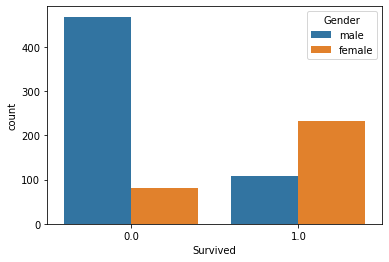

In [4]:
sns.countplot(x="Survived", hue = "Gender", data=dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

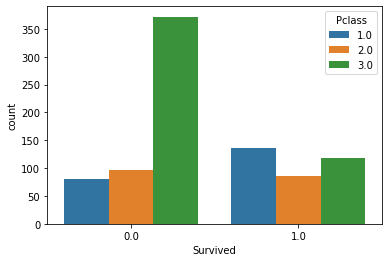

In [5]:
sns.countplot(x="Survived", hue = "Pclass", data=dataset)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pid       1304 non-null   float64
 1   Name      1304 non-null   object 
 2   Gender    1309 non-null   object 
 3   Age       1302 non-null   float64
 4   Pclass    1304 non-null   float64
 5   Boarded   1304 non-null   object 
 6   Sib-Sp    1309 non-null   int64  
 7   Par-ch    1309 non-null   int64  
 8   Fare      1308 non-null   float64
 9   Survived  891 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 102.4+ KB


In [7]:
dataset.isnull().sum()

Pid           5
Name          5
Gender        0
Age           7
Pclass        5
Boarded       5
Sib-Sp        0
Par-ch        0
Fare          1
Survived    418
dtype: int64

In [8]:
dataset = dataset.dropna(how='any', axis = 0)

In [9]:
dataset.isnull().sum()

Pid         0
Name        0
Gender      0
Age         0
Pclass      0
Boarded     0
Sib-Sp      0
Par-ch      0
Fare        0
Survived    0
dtype: int64

In [10]:
dataset.head(10)

,Pid,Name,Gender,Age,Pclass,Boarded,Sib-Sp,Par-ch,Fare,Survived
0,691.0,"Braund, Mr. Owen Harris",male,22.0,3.0,Southampton,1,0,7.2500,0.0
1,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",female,35.0,1.0,Cherbourg,1,0,71.2833,1.0
2,865.0,"Heikkinen, Miss Laina",female,26.0,3.0,Southampton,0,0,7.9250,1.0
3,127.0,"Futrelle, Mrs. Lily May (née Peel)",female,35.0,1.0,Southampton,1,0,53.1000,1.0
4,627.0,"Allen, Mr. William Henry",male,35.0,3.0,Southampton,0,0,8.0500,0.0
5,785.0,"Doherty, Mr. William John (aka ""James Moran"")",male,22.0,3.0,Queenstown,0,0,8.4583,0.0
6,200.0,"McCarthy, Mr. Timothy J.",male,54.0,1.0,Southampton,0,0,51.8625,0.0
7,1108.0,"Pålsson, Master Gösta Leonard",male,2.0,3.0,Southampton,3,1,21.0750,0.0
8,902.0,"Johnson, Mrs. Elisabeth Vilhelmina (née Berg)",female,26.0,3.0,Southampton,0,2,11.1333,1.0
9,520.0,"Nassr Allah, Mrs. Adal (née Akim)[62][77]",female,14.0,2.0,Cherbourg,1,0,30.0708,1.0


In [11]:
dataset.shape

(887, 10)

In [12]:
one_hot_encoder = pd.get_dummies(dataset['Gender']) 
dataset = pd.concat([dataset,one_hot_encoder], axis=1)
dataset

,Pid,Name,Gender,Age,Pclass,Boarded,Sib-Sp,Par-ch,Fare,Survived,female,male
0,691.0,"Braund, Mr. Owen Harris",male,22.0,3.0,Southampton,1,0,7.2500,0.0,0,1
1,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",female,35.0,1.0,Cherbourg,1,0,71.2833,1.0,1,0
2,865.0,"Heikkinen, Miss Laina",female,26.0,3.0,Southampton,0,0,7.9250,1.0,1,0
3,127.0,"Futrelle, Mrs. Lily May (née Peel)",female,35.0,1.0,Southampton,1,0,53.1000,1.0,1,0
4,627.0,"Allen, Mr. William Henry",male,35.0,3.0,Southampton,0,0,8.0500,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,514.0,"Montvila, Father Juozas",male,27.0,2.0,Southampton,0,0,13.0000,0.0,0,1
887,137.0,"Graham, Miss Margaret Edith",female,19.0,1.0,Southampton,0,0,30.0000,1.0,1,0
888,910.0,"Johnston, Miss Catherine Nellie",female,7.0,3.0,Southampton,1,2,23.4500,0.0,1,0
889,28.0,"Behr, Mr. Karl Howell",male,26.0,1.0,Cherbourg,0,0,30.0000,1.0,0,1


In [13]:
import numpy as np
dataset['Survived'] = dataset['Survived'].apply(np.int64) 

In [14]:
data = dataset.drop(['Name','Boarded','Gender'], axis=1)
data

,Pid,Age,Pclass,Sib-Sp,Par-ch,Fare,Survived,female,male
0,691.0,22.0,3.0,1,0,7.2500,0,0,1
1,90.0,35.0,1.0,1,0,71.2833,1,1,0
2,865.0,26.0,3.0,0,0,7.9250,1,1,0
3,127.0,35.0,1.0,1,0,53.1000,1,1,0
4,627.0,35.0,3.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,514.0,27.0,2.0,0,0,13.0000,0,0,1
887,137.0,19.0,1.0,0,0,30.0000,1,1,0
888,910.0,7.0,3.0,1,2,23.4500,0,1,0
889,28.0,26.0,1.0,0,0,30.0000,1,0,1


In [15]:
x = data.drop(['Survived'], axis=1)
y = data['Survived']

x.head(10)

,Pid,Age,Pclass,Sib-Sp,Par-ch,Fare,female,male
0,691.0,22.0,3.0,1,0,7.2500,0,1
1,90.0,35.0,1.0,1,0,71.2833,1,0
2,865.0,26.0,3.0,0,0,7.9250,1,0
3,127.0,35.0,1.0,1,0,53.1000,1,0
4,627.0,35.0,3.0,0,0,8.0500,0,1
5,785.0,22.0,3.0,0,0,8.4583,0,1
6,200.0,54.0,1.0,0,0,51.8625,0,1
7,1108.0,2.0,3.0,3,1,21.0750,0,1
8,902.0,26.0,3.0,0,2,11.1333,1,0
9,520.0,14.0,2.0,1,0,30.0708,1,0


In [16]:
y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [19]:
print(pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred}))

     Actual Value  Predicted Value
839             1                1
200             0                0
267             1                0
766             0                0
713             0                0
..            ...              ...
100             0                1
527             0                1
125             1                0
142             1                1
21              1                0

[267 rows x 2 columns]


In [20]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[154,  18],
       [ 23,  72]])

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.846441947565543